In [ ]:
import pandas as pd
import numpy as np

In [ ]:
cities=pd.read_csv("/content/drive/MyDrive/MyData/cities_r2.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cities.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [ ]:
print(cities.shape)

(493, 22)


In [ ]:
cities.describe()

,state_code,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,total_graduates,male_graduates,female_graduates
count,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000,493.000000,493.000000,493.000000,4.930000e+02,4.930000e+02,4.930000e+02
mean,18.643002,16.782961,4.481124e+05,2.343468e+05,2.137656e+05,4.709285e+04,24849.527383,22243.320487,3.461527e+05,1.894384e+05,1.567143e+05,930.294118,902.332657,85.131460,89.920162,79.967181,6.620236e+04,3.771556e+04,2.848680e+04
std,9.297168,15.566131,1.033228e+06,5.487786e+05,4.848622e+05,1.050279e+05,55535.310272,49523.241379,8.220952e+05,4.534753e+05,3.690677e+05,55.849106,49.794689,6.186345,5.377492,7.577825,1.778187e+05,9.849574e+04,7.951556e+04
min,1.000000,1.000000,1.000360e+05,5.020100e+04,4.512600e+04,6.547000e+03,3406.000000,3107.000000,5.699800e+04,3.475100e+04,2.224700e+04,700.000000,762.000000,49.510000,52.270000,46.450000,2.532000e+03,1.703000e+03,8.290000e+02
25%,9.000000,7.000000,1.261420e+05,6.638400e+04,6.041100e+04,1.363900e+04,7221.000000,6457.000000,9.768700e+04,5.357800e+04,4.391400e+04,890.000000,868.000000,81.750000,87.280000,75.800000,1.527700e+04,9.289000e+03,6.114000e+03
50%,19.000000,13.000000,1.841330e+05,9.665500e+04,8.776800e+04,1.944000e+04,10342.000000,9172.000000,1.413290e+05,7.590600e+04,6.383600e+04,922.000000,903.000000,85.970000,91.180000,80.920000,2.395900e+04,1.404900e+04,9.558000e+03
75%,27.000000,21.000000,3.490330e+05,1.750550e+05,1.700260e+05,3.794500e+04,19982.000000,17954.000000,2.679000e+05,1.455480e+05,1.235030e+05,971.000000,942.000000,89.330000,93.400000,85.400000,5.036700e+04,2.787200e+04,2.086600e+04
max,35.000000,99.000000,1.247845e+07,6.736815e+06,5.741632e+06,1.209275e+06,647938.000000,561337.000000,1.023759e+07,5.727774e+06,4.509812e+06,1093.000000,1185.000000,98.800000,99.300000,98.310000,2.221137e+06,1.210040e+06,1.011097e+06


In [ ]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name_of_city                    493 non-null    object 
 1   state_code                      493 non-null    int64  
 2   state_name                      493 non-null    object 
 3   dist_code                       493 non-null    int64  
 4   population_total                493 non-null    int64  
 5   population_male                 493 non-null    int64  
 6   population_female               493 non-null    int64  
 7   0-6_population_total            493 non-null    int64  
 8   0-6_population_male             493 non-null    int64  
 9   0-6_population_female           493 non-null    int64  
 10  literates_total                 493 non-null    int64  
 11  literates_male                  493 non-null    int64  
 12  literates_female                493 

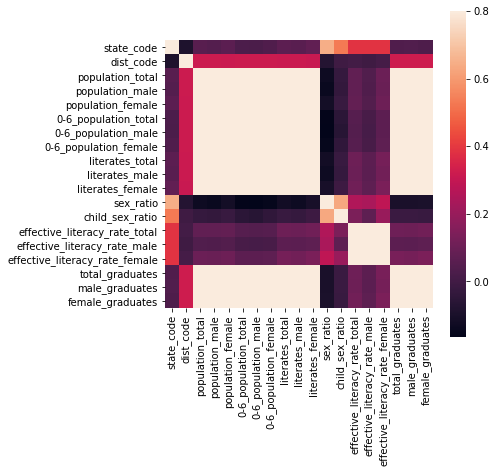

In [ ]:
 from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
corr = cities.corr()
f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(corr,vmax=.8,square=True)

In [ ]:
cities.describe(include='O')

,name_of_city,state_name,location
count,493,493,493
unique,492,29,490
top,Aurangabad,UTTAR PRADESH,"22.6500518,88.3423199"
freq,2,63,2


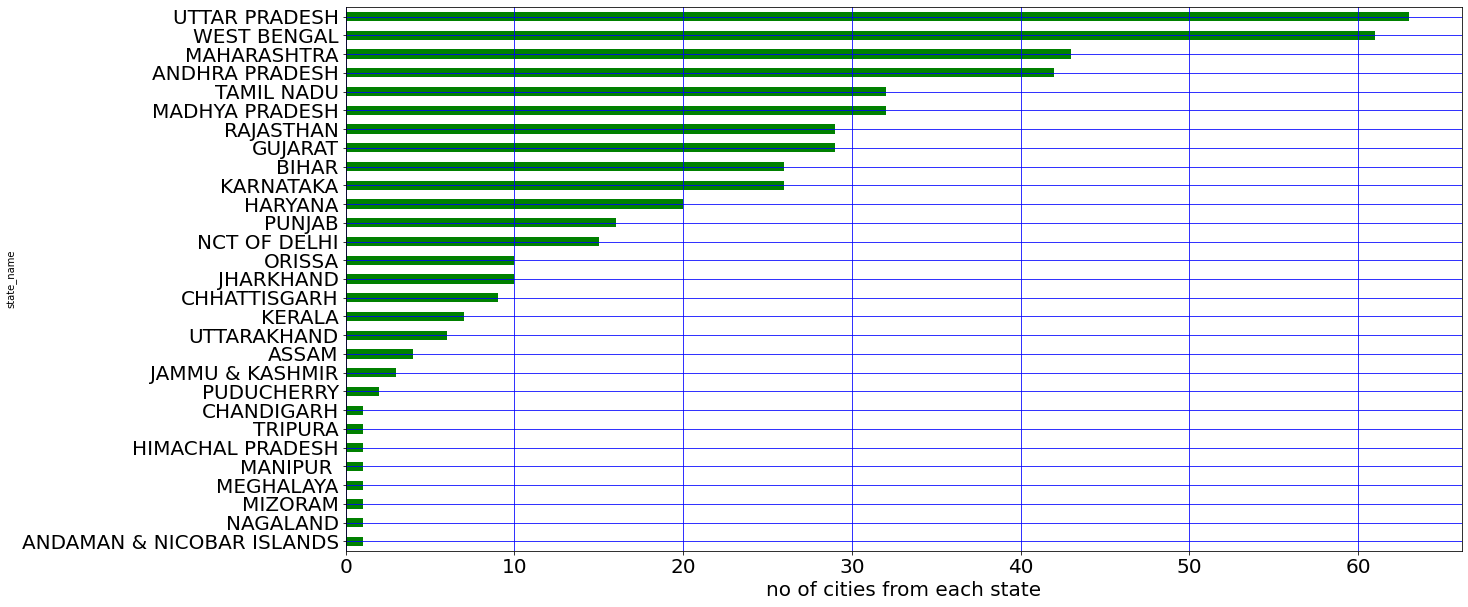

In [ ]:
fig = plt.figure(figsize=(20,10))
states = cities.groupby('state_name')['name_of_city'].count().sort_values(ascending=True)
states.plot(kind ="barh",fontsize=20,color="green")
plt.grid(b=True,which='both',color='blue')
plt.xlabel("no of cities from each state",fontsize=20)
plt.show()

Text(0, 0.5, 'States')

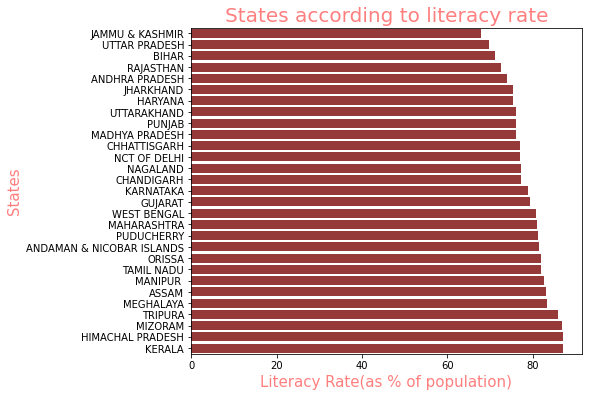

In [ ]:
lit_by_states = cities.groupby('state_name').agg({'literates_total':np.sum})
pop_by_states = cities.groupby('state_name').agg({'population_total':np.sum})
literate_rate = lit_by_states.literates_total*100/pop_by_states.population_total
literate_rate = literate_rate.sort_values(ascending=True)

plt.subplots(figsize=(7, 6))
ax = sns.barplot(x=literate_rate, y=literate_rate.index,color='brown')
ax.set_title('States according to literacy rate', size=20, alpha=0.5, color='red')
ax.set_xlabel('Literacy Rate(as % of population)', size=15, alpha=0.5, color='red')
ax.set_ylabel('States', size=15, alpha=0.5, color='red')